# AMAT502:  Lecture 24. More on inverse problems. 

April 11, 2019.

Michael Lamoureux

In [1]:
## Some startup commands

%matplotlib inline
from numpy import * 
from scipy import *
from math import tau
from matplotlib.pyplot import *

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import *
from matplotlib import cm


## Inverse Problems

Basic idea. Measure some data, deduce something about something "hidden."

#### Examples.

1. Record positions and times of a falling object. Use this to determine acceleration due to gravity. (Can do this to an accuracy of 1 part in a billion.)

2. Record electrical conductivity of an object: human body, a lump of dirt, the ground near the surface of the earth that has been contaminated with an oil spill or something. Use this to create an image (of what's inside the human body, or what's in the dirt.)

3. Record adsorbtion of X-rays going through the human body (CT scan) or through some material like a wall or a bridge (non-destructive testing). Create an image of what is inside, without having to cut anything open.

#### Basic set up

Model m = some physical parameters of some system

Data d = data from some measurements

We assume the physics is understood well enough that we can describe the process of going from model m to data d. THis gives an operator G with
$$d = G(m).$$
In real life, there is always noise in the data, so we might write
$$d = G(m_{true}) + \eta \,(noise).$$

1. Given m, can we find d? (This is the **Forward Problem.**)
2. Given d, can we find m? (This is the **Inverse Problem.**)
3. Given m and d, can we find G? (This is the **Systems Identification Problem.**)

Today we are mainly interested in **Inverse Problems.**


## Categories of inverse problems

1. Discrete problems. Data d and model m are finite vectors. If number of components in m is small, it is called a **parameter estimation problem.**

2. Continuous problems. When m,d are functions of space and time. For instance, our model might be the density of the earth (or of the human body). The model $m = m(x,y,z)$ is a function of space, not just a vector. 

The process of going from continuous to a discrete approximation is an important option in solving these problems.

3. Linear systems. When the operator $G$ is linear.
 - $G(m_1 + m_2) = G(m_1) + G(m_2).$
 - $G(\alpha m) = \alpha G(m).$
 
 
### Linear examples

1. Kernel operators
$$d(x) = \int_a^b g(x,y)m(y) dy.$$

2. Convolution operators
$$d(x) = \int_{-\infty}^\infty g(x-y)m(y) dy.$$
Leads to a deconvolution problem. Important in seismic imaging, radar imaging, and more

3. Fourier transforms
$$F(f)(\omega) = \int_{-\infty}^\infty f(x)e^{2\pi i x\omega}  dx.$$
In the FT case, you often have only partial information, still want to recover the function $f(x)$ as best you can. 

These examples come up in medical imaging, geophysical imaging, non-destructive testing. All kinds of mathematical modelling problems.

## Real example. Falling object

An projectile will follow a parabolic path, and you can write down height as a function of time via 
$$y(t) = m_1 + m_2 t + \frac{1}{2} m_3 t^2.$$
Here, the parameters $m_1,m_2,m_3$ are the model parameters. The data collected will be a sequence pairs of time samples and heights, $(t_i,y_i), as measured while the object falls. 

This can be put into matrix form
$$
\left[
\begin{array}{ccc}
1 & t_1 & -\frac{1}{2} t_1^2 \\
1 & t_2 & -\frac{1}{2} t_2^2 \\
1 & t_3 & -\frac{1}{2} t_3^2 \\
\vdots & \vdots & \vdots \\
1 & t_1 & -\frac{1}{2} t_1^2 \\
\end{array}
\right]
\left[
\begin{array}{c}
m_1 \\
m_2 \\
m_3
\end{array}
\right]
=
\left[
\begin{array}{c}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{array}
\right].
$$

This is a linear system, and we can write as $G \mathbf{m} = \mathbf{y}$. The $y$ are the data, and the $m$ are model parameters we wish to estimate. ($m_3$ will be acceleration due to gravity, the one we are really interested in.)

This linear system is over-determined, so in general we cannot expect an exact solution. We could, however, choose the best fitting parameters.

### Least squares:

Minimize$_m$ $|| \mathbf{y} - G\mathbf{m} ||_2$,
where this el-2 norm is given as 
$$ || \mathbf{y} - G\mathbf{m} ||_2 = \sqrt{\sum_{i=1}^n |y_i - (G\mathbf{m})_i|^2} ,$$
which is the usual Euclidean distance, or norm.

You may have seen this before in Linear Algebra or a Statistics course. The Least Square Minimum is found via the **normal equation** with solution
$$\hat{\mathbf{m}} = (G^TG)^{-1} G^T \mathbf{y}.$$
Here, $G^T$ means the transpose of the matrix $G$. In our example above with the falling object, the matrix $G^TG$ is a 3 x 3 matrix, so easy to invert.

### L1 minimization

Minimize$_m$ $|| \mathbf{y} - G\mathbf{m} ||_1$,
where this el-1 norm is given as 
$$ || \mathbf{y} - G\mathbf{m} ||_1 = \sum_{i=1}^n |y_i - (G\mathbf{m})_i| ,$$
which is the usual Euclidean distance, or norm.

It turns out the L1 minimization is more robust, and does a good job of ignoring outliers. It is good with noise that is not Gaussian, but has **fat tails.**

However, there is nothing like the normal equations to solve this. You need to use an numerical algorithm to minimize this. This we why we learned about minimization techniques in the last few lectures.

Sometimes this stuff comes up in the context of **LASSO** (least absolute shrinkage and selection operator), **compressed sensing,** and **sparse sampling.** 


## Well-posedness of an inverse problem
- does a solution exist?
- is the solution unique?
- is the solution stable with respect to small changes in the data? (e.g. like noise)

If we have these 3 properties, we say the problem is **well-posed.** If not, it is ill-posed. In that case, we have to reformulate the problem into something that is well-posed. This could mean adding regularization, or adding more information to the problem, to make it well posed.








## The falling object problem.

Let's see if we can do some simple minimization to find a solution to the falling object problem.

We define a function $f$ to describe the parabola of the falling object.

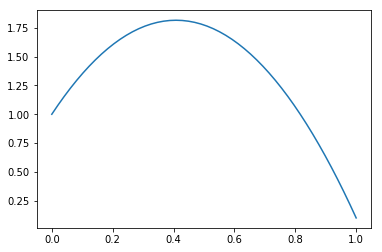

In [2]:
def f(t,m):
    return m[0] + m[1]*t + 0.5*m[2]*t**2

t = linspace(0,1)

m = [1,4,-9.8]
plot(t,f(t,m));



Now we create a model and some data, to get the matrix G

In [3]:
len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2
G



array([[1.        , 0.        , 0.        ],
       [1.        , 0.11111111, 0.00617284],
       [1.        , 0.22222222, 0.02469136],
       [1.        , 0.33333333, 0.05555556],
       [1.        , 0.44444444, 0.09876543],
       [1.        , 0.55555556, 0.15432099],
       [1.        , 0.66666667, 0.22222222],
       [1.        , 0.77777778, 0.30246914],
       [1.        , 0.88888889, 0.39506173],
       [1.        , 1.        , 0.5       ]])

Now we solve using the normal equations.

In [4]:
linalg.inv(transpose(G)@G)@transpose(G)@y

array([ 1. ,  4. , -9.8])

Notice the solution is exact. But that is because we had no noise.

## Better test

We should try adding some noise to the data y. The function randn is normally distributed noise, added in below.



In [5]:
y = f(tk,m_true) + .05*randn(len)
m_best = linalg.inv(transpose(G)@G)@transpose(G)@(y )
m_best

array([  1.02751914,   4.0212044 , -10.03046836])

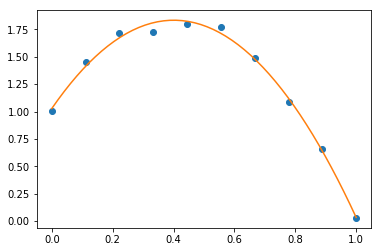

In [6]:
plot(tk,y,'o',t,f(t,m_best));

## L1 minimization

Let's do the L1 minimation, see how that works.


In [7]:
from scipy.optimize import fmin_cg,fmin_bfgs

len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) +0*randn(len)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2


def fnorm1(m):
    return sum(abs(y - G@m))

m_best2 = fmin_cg(fnorm1, [1,4,-9.5])
m_best2

         Current function value: 0.086968
         Iterations: 5
         Function evaluations: 342
         Gradient evaluations: 68


array([ 1.02072861,  3.88242558, -9.56619713])

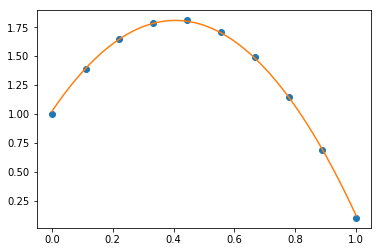

In [8]:
plot(tk,y,'o',t,f(t,m_best2));

## Yikes.

Even with perfect data, the conjugate gradient method does not find a good solution. Although the fit looks good. 

Let's try **bfgs** optimization instead.

In [9]:
len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) +0*randn(len)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2


fmin_bfgs(fnorm1, [0,0,0])


         Current function value: 0.000000
         Iterations: 35
         Function evaluations: 762
         Gradient evaluations: 150


array([ 0.99999999,  4.00000005, -9.80000013])

## Wow!

Looks good. Let's see if it can handle noise. 

In [10]:
len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) +.2*randn(len)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2

m_best3 = fmin_bfgs(fnorm1, [0,0,0])
m_best3

         Current function value: 1.191422
         Iterations: 17
         Function evaluations: 597
         Gradient evaluations: 117


array([  0.94301208,   5.00025572, -12.17205165])

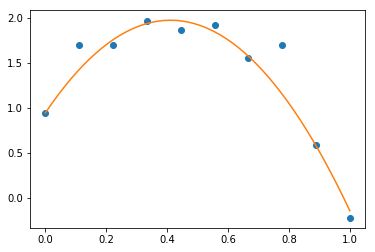

In [11]:
plot(tk,y,'o',t,f(t,m_best3));

         Current function value: 4.651644
         Iterations: 7
         Function evaluations: 607
         Gradient evaluations: 119


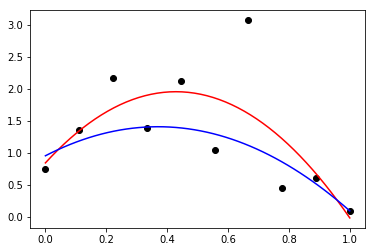

In [12]:
## Okay, let's compare L2 and L1 minimization


len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) +.5*randn(len)
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2

m_L2 = linalg.inv(transpose(G)@G)@transpose(G)@y
m_L1 = fmin_bfgs(fnorm1, [0,0,0])

plot(tk,y,'ok',t,f(t,m_L2),'-r',t,f(t,m_L1),'-b');

## Blue looks better?

That is the L1 minimization

Let's try one outlier.

         Current function value: 0.800000
         Iterations: 25
         Function evaluations: 782
         Gradient evaluations: 154


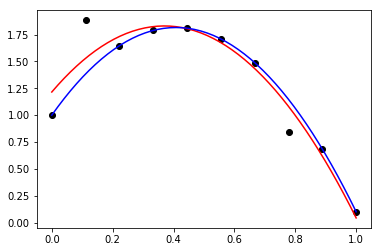

In [13]:
len = 10
m_true = [1,4,-9.8]
tk = linspace(0,1,len)
y = f(tk,m_true) 
G = zeros((len,3))
G[:,0] = ones(len)
G[:,1] = tk
G[:,2] = 0.5*tk**2

y[1] += 0.5
y[7] -= 0.3
m_L2 = linalg.inv(transpose(G)@G)@transpose(G)@y
m_L1 = fmin_bfgs(fnorm1, [0,0,0])

plot(tk,y,'ok',t,f(t,m_L2),'-r',t,f(t,m_L1),'-b');

## Cool.

The L1 minimizer totaly ignored the outlier.

##  Normal equations

We said, without much comment, that to minimize the L2 norm $$|| y - Gm ||_2,$$ we just solve the **normal** equations.

YOu might recall seeing this in calculus or linear algerba. Let's review, just because now we really want to use this.

The point is, to minimize the L2 norm, is the same thing as minimizing its square, which is the function
$$F(m) = || y - Gm ||_2^2,$$
as a function of m. To minimize a function, we just have to set its gradient to zero. 

Now, from calculus we could compute the gradient directly. But it is easier to think of finding the gradient as the linear approximation to the function $F(m+\delta m)$ as a function of $\delta m$. Since this is all just linear algebra, this is easy. 

We write

$$F(m+\delta m)  = (y - G(m+\delta m))^T(y - G(m+\delta m)) = y^Ty -(G(m+\delta m))^Ty - y^TG(m + \delta m) + (G(m+\delta m)^TG(m + \delta m).$$
We pick out the terms that are linear in $\delta m$ and this is the gradient
$$\nabla F(m) = -(G\delta m)^Ty - y^TG\delta m + (G\delta m)^T Gm + (Gm)^T G\delta m.$$

Pulling through the transposes, this simplifies to
$$\delta m \cdot \nabla F(m) = -2\delta m^T G^T y  - 2\delta m^TG^TGm .$$

So we solve
$$0 = \nabla F(m) = -2(G^T y  - G^TGm),$$
which gives us
$$G^T y  = G^TGm.$$
Multiply by the inverse of $G^TG$ to get 
$$ (G^TG)^{-1}G^T y = m,$$
which are the normal equations.

## Singular value decomposition

Point is, how to invert matrices that are ill-conditioned.

$G$ and m by n matrix, write it as 
$$G = USV^T,$$

where $S$ is a diagonal matrix of size m by n, and $U$, $V$ are orthogonal matrices of the appropriate size. 

Can always choose the entries in $S$ to be non-negative, and usually we order them as
$$s_1 \geq s_2 \geq s_3 \geq \ldots \geq 0.$$

Here is an example with a rando, 10x10 matrix:

In [14]:
a = rand(10,10)
a

array([[0.24729282, 0.92694022, 0.64061061, 0.44876691, 0.24016875,
        0.7928964 , 0.85574156, 0.44084318, 0.71009411, 0.44425877],
       [0.96889897, 0.56156786, 0.32242887, 0.19139944, 0.68054274,
        0.84399063, 0.21091807, 0.22169564, 0.69372022, 0.25632705],
       [0.74792236, 0.13882017, 0.24951215, 0.16782865, 0.81562899,
        0.87359411, 0.81500627, 0.10187402, 0.80605341, 0.51004315],
       [0.70997737, 0.33901622, 0.2484228 , 0.69303589, 0.15742988,
        0.7371483 , 0.17908791, 0.74562812, 0.1345323 , 0.04713214],
       [0.40484859, 0.81010171, 0.57380243, 0.34465838, 0.62795711,
        0.57066672, 0.29277435, 0.89373596, 0.70552947, 0.4215978 ],
       [0.6470024 , 0.78346513, 0.4585146 , 0.13706271, 0.29189956,
        0.30915155, 0.57856308, 0.98931083, 0.06383423, 0.04301647],
       [0.44972252, 0.26101444, 0.47588958, 0.53231948, 0.96713546,
        0.56983054, 0.3184753 , 0.34233935, 0.09907282, 0.17888793],
       [0.54564721, 0.12141368, 0.7817473

In [15]:
linalg.det(a)

0.018758323381320517

In [16]:
u, s, vh = np.linalg.svd(a, full_matrices=True)

In [17]:
u

array([[-0.36100919, -0.28415072, -0.21033811, -0.6202811 , -0.13781156,
         0.47681313,  0.20406622,  0.09895584,  0.24930021, -0.00336199],
       [-0.33053341, -0.42113176,  0.15587789,  0.36432801,  0.1661159 ,
        -0.18126714, -0.13181676, -0.13032732,  0.67668898, -0.06034719],
       [-0.33759567, -0.38048548,  0.57564933, -0.13286824, -0.24124069,
        -0.29327427,  0.15362585, -0.04231447, -0.44679619,  0.15168624],
       [-0.26857526,  0.01292378, -0.24996289,  0.47383085, -0.68374281,
         0.28445626, -0.23684324, -0.03818323, -0.11719632,  0.14489972],
       [-0.36841385, -0.05282007, -0.2391623 , -0.18861836,  0.28968766,
        -0.08340425, -0.6432822 , -0.20186111, -0.34282442, -0.32518011],
       [-0.29554565,  0.11732392, -0.51001366,  0.02027324, -0.13716142,
        -0.6026279 ,  0.44035112,  0.11174273, -0.00516912, -0.22353305],
       [-0.28684753,  0.16937453,  0.26622711,  0.24889615,  0.16252779,
         0.24797258,  0.06117475,  0.69552388

In [18]:
## Here we check that u is really an orthogonal matrix.
## The product with its transpose should be the identity matrix.
transpose(u)@u

array([[ 1.00000000e+00,  2.72407710e-16, -7.96711933e-17,
         5.00972294e-16,  1.57023257e-16, -6.32532398e-18,
        -1.53089888e-16,  4.23852673e-17, -1.40800106e-16,
         3.23703455e-17],
       [ 2.72407710e-16,  1.00000000e+00,  2.24732949e-17,
         4.06568836e-16, -5.56698616e-17, -6.28682029e-17,
        -7.15642450e-17,  3.39683535e-18, -7.84157680e-17,
         4.63170136e-17],
       [-7.96711933e-17,  2.24732949e-17,  1.00000000e+00,
        -5.37463761e-16,  1.93871396e-16,  1.41466759e-17,
        -2.23948657e-16, -7.36315021e-17, -5.20188489e-17,
         2.96817876e-18],
       [ 5.00972294e-16,  4.06568836e-16, -5.37463761e-16,
         1.00000000e+00,  1.68906763e-17, -1.05608072e-17,
        -1.06034830e-16, -1.70910746e-16, -1.42205888e-16,
        -2.85998167e-17],
       [ 1.57023257e-16, -5.56698616e-17,  1.93871396e-16,
         1.68906763e-17,  1.00000000e+00, -2.48430068e-16,
        -1.20226138e-16,  2.46917134e-16,  4.09833075e-16,
        -2.

In [19]:
## Here are the singular values.
s

array([4.87391124, 1.48695408, 1.29643902, 0.99394764, 0.72516741,
       0.63429958, 0.55815507, 0.35165251, 0.18735853, 0.11874859])

In [20]:
## Here is the inverse of this matrix
linalg.inv(a)

array([[-3.80850179e-01,  8.95880037e-01,  9.95704253e-02,
         1.82812145e-01, -6.10338263e-01,  3.45348407e-01,
        -1.02904229e+00,  7.39323578e-01,  2.00750337e-01,
        -1.89862644e-01],
       [ 3.94046224e-01, -6.79803389e-02, -6.70785845e-02,
        -7.18356270e-02, -8.71656119e-01, -3.13525030e-01,
        -6.74588352e-01, -8.52337348e-01,  2.12371638e+00,
         8.76090888e-01],
       [ 7.95422889e-01,  1.74903208e+00, -2.02015155e+00,
        -1.28826654e+00,  1.19810413e+00,  1.15646293e+00,
         1.96326271e+00,  1.95201053e+00, -3.96455217e+00,
        -2.09476937e+00],
       [ 4.54693539e-01, -1.15101654e-01,  2.61540206e-02,
         1.17009648e+00, -1.35389911e+00, -1.52083309e+00,
        -1.51631466e+00, -1.62754650e-01,  2.11722593e+00,
         1.50453400e+00],
       [-4.57688098e-01, -1.75780364e-01,  3.35509973e-01,
        -3.65154005e-01, -2.20373821e-01, -2.74295106e-01,
         5.24229010e-01, -7.15201398e-01,  1.02333045e+00,
         8.

## Geophysics model

Let's do an example where the matrix that appears is very ill-conditioned, so trying to compute the inverse numerically will give problems. (Basically like trying to divide by zero.)

The geophysical model is that we have an instrument like a seismometer that is responding to seismic waves, like an earthquake. The point is the data we record is an convolution of the instrument response with the actual data. We could write it as

$$v(t) = (g*m)(t) = \int_{-\infty}^\infty g(t-\tau)m(\tau) d\tau.$$

Instrument response in this example is a dampled exponential:

$$g(t) = t*\exp(-t/T_0).$$

True data is some function $m(t)$. Measured response is the convolution

$$v(t) = \int_{-\infty}^\infty g(t-\tau)m_{true}(\tau) d\tau.$$

We discretize this to a matrix form by sampling in time, to get a matrix-vector equation:

$$ \mathbf{d} = \mathbf{Gm}.$$

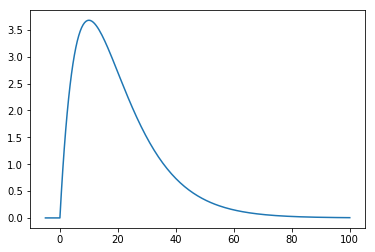

In [21]:
## Geophysics example, the  instrument response curve

t = linspace(-5,100,211)
dt = t[1]-t[0]
T0 = 10

plot(t,maximum(0,t*exp(-t/T0)));

In [22]:
## The corresponding sampled matrix
G = zeros((211,211))
for i in range(0,211):
    for j in range(0,i):
        G[i,j] = (t[i]-t[j])*exp(-(t[i]-t[j])/T0)*dt

        

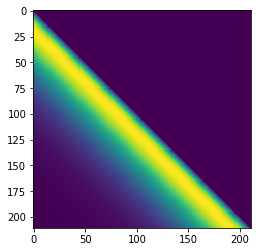

In [23]:
## Since this matrix is so big, let's plot it as an image
## Notice it is constant along sub-diagonals. 
## This is called a Toeplitz matrix, which comes up a lot in convolution.
imshow(G);

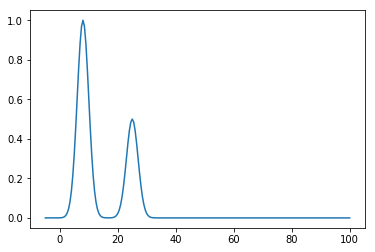

In [24]:
## Here is an example of true data. Two spikes, corresponding to 
## two pulses of an earthquake, say. 
sigma = 2
m_true = exp(-(t-8)**2/(2*sigma**2)) + 0.5*exp(-(t-25)**2/(2*sigma**2))
plot(t,m_true);

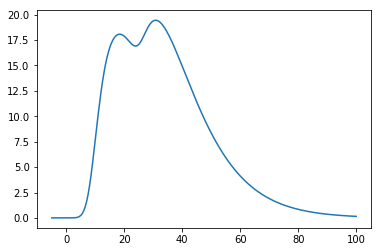

In [25]:
## The measured data is a obtained as the convolution of m with the instrument response
## In the discretized version, it is matrix G applied to m
d = G@m_true
plot(t,d);

In [26]:
## To inverse, we try to compute the inverse matrix
## This will fail, giving an error message
## The problem is that G is ill-conditioned, 
## so it's inverse is hard (or impossible) to compute numerically
m = linalg.inv(G)@d
plot(t,m);

LinAlgError: Singular matrix

## What to do with singular matrices

The problem here is that matrix $G$ is almost singular, so you cannot compute the inverse numerically.

A solution is to take the singular value decomposition, and inverse only the singular values that are "big enough." That means, take the reciprocals of the sequence 
$$s_1 \geq s_2 \geq s_3 \geq \ldots \geq s_n \geq 0$$
but only take reciprocals for the $s_k$ that are not too close to zero.

This is called the "Penrose inverse" after mathematicial Roger Penrose. (The guy who did Penrose tiles, and also black holes. Wow!)

Numerically, there is a function called "pinv" which does this for you. We can call it up in Numpy as follows:

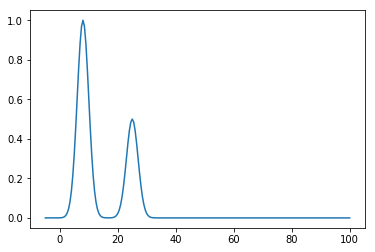

In [29]:
## Here we show the Penrose inverse recovers the initial true model m
m = linalg.pinv(G)@d
plot(t,m);

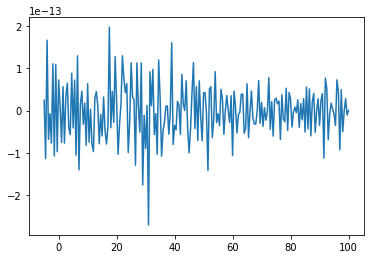

In [31]:
## Let's compare the computed m with the true m. Error is really small.
plot(t,m-m_true)

## Dealing with noise

The point of the Penrose inverse is that it deals with noise very well. For instance, if we add a bit of noise to our measured data, we can still recover the model reasonably well. 

Here is the data from the geophysics model, and a noisy version:

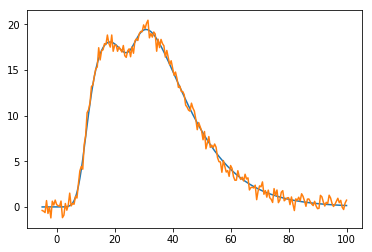

In [35]:
plot(t,d,t,d+.5*randn(211));

To recover the model from the noisy data, we use the Penrose inverse. Note that we should adjust the "recovered condition number" called rcond in the code, to adjust how stable an answer we want.

This is a bit of an art form. You should experiment yourself with different levels of noise, different values of rcond.

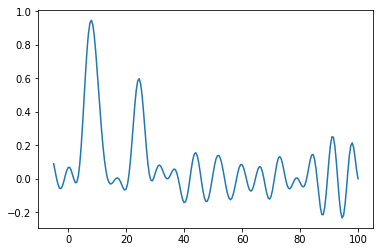

In [45]:
## Here is a good choice of rcond
m = linalg.pinv(G,rcond=.01)@(d + 0.5*randn(211))
plot(t,m);

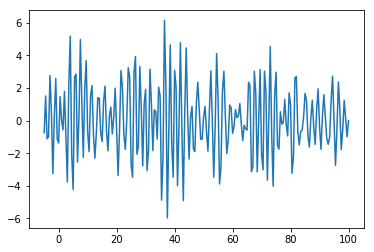

In [46]:
## This choice for rcond is too small. Can't really recover the model
m = linalg.pinv(G,rcond=.001)@(d + 0.5*randn(211))
plot(t,m);

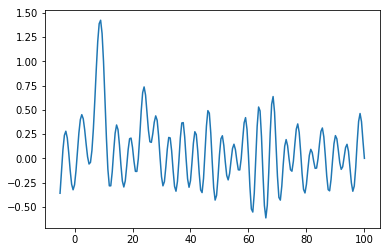

In [47]:
## This choice is still a bit too small. We do see signs of the model, though.
m = linalg.pinv(G,rcond=.005)@(d + 0.5*randn(211))
plot(t,m);

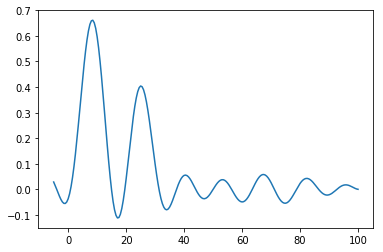

In [48]:
## This choice is a bit too big.
m = linalg.pinv(G,rcond=.05)@(d + 0.5*randn(211))
plot(t,m);